Vraag A. 1.

In [5]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/martijn/Documents/belangrijk/Studie/Complex_networks/SFHH2025.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Create an undirected graph from the dataset
G = nx.Graph()

# Add edges, ignoring time steps
edges = df[['id1', 'id2']].drop_duplicates().values.tolist()
G.add_edges_from(edges)

# 1. Number of nodes (N)
N = len(G.nodes())

# 2. Number of links (L)
L = len(G.edges())

# 3. Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# 4. Compute the average degree E[D]
E_D = np.mean(degrees)

# 5. Compute the standard deviation of the degree sqrt(Var[D])
std_D = np.std(degrees)

# Print results
print("Number of nodes (N):", N)
print("Number of links (L):", L)
print("Average degree (E[D]):", E_D)
print("Standard deviation of the degree (sqrt(Var[D])):", std_D)


Number of nodes (N): 401
Number of links (L): 9415
Average degree (E[D]): 46.957605985037404
Standard deviation of the degree (sqrt(Var[D])): 29.918521078014955


A. 2.

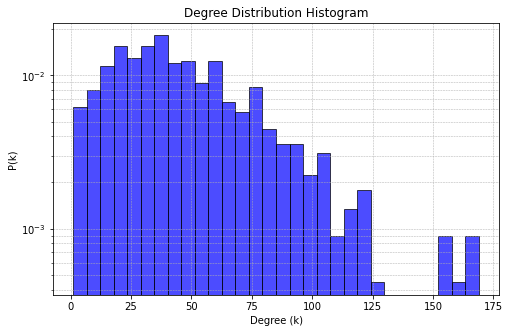

In [6]:
# Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=30, color="blue", alpha=0.7, edgecolor="black", density=True)

# Set y-axis to log scale
plt.yscale("log")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution Histogram")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Calculating best minimal value for power law fit


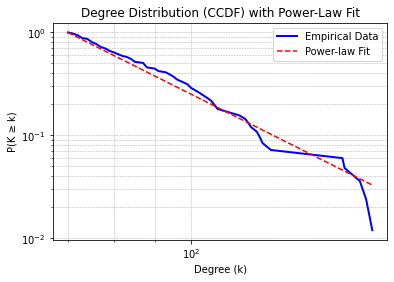

Estimated power-law exponent: 4.8699441983790095


In [7]:
import powerlaw

# Fit the degree distribution to a power law
fit = powerlaw.Fit(degrees)

# Plot the degree distribution with a power-law fit
fig = fit.plot_ccdf(color="blue", linewidth=2, label="Empirical Data")
fit.power_law.plot_ccdf(color="red", linestyle="--", ax=fig, label="Power-law Fit")

plt.xlabel("Degree (k)")
plt.ylabel("P(K ≥ k)")
plt.title("Degree Distribution (CCDF) with Power-Law Fit")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Print estimated exponent
print(f"Estimated power-law exponent: {fit.alpha}")


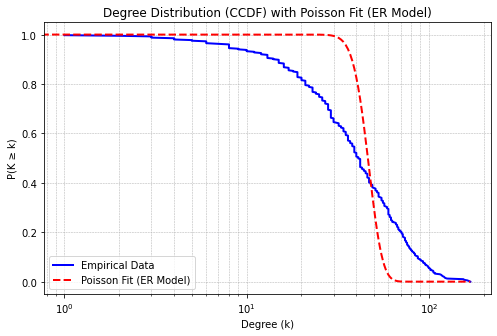

Fitted mean degree (λ) for ER model: 46.96


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Step 1: Extract degree data
real_degrees = np.array([d for _, d in G.degree()])

# Step 2: Fit a Poisson distribution
lambda_fit = np.mean(real_degrees)  # Poisson parameter (mean degree)

# Step 3: Compute CCDF for the real data
sorted_real_degrees = np.sort(real_degrees)
ccdf_real = 1 - np.arange(1, len(sorted_real_degrees) + 1) / len(sorted_real_degrees)

# Step 4: Generate Poisson CCDF
x_vals = np.arange(0, max(real_degrees) + 1)
poisson_cdf = poisson.cdf(x_vals, lambda_fit)
poisson_ccdf = 1 - poisson_cdf  # Complementary CDF

# Step 5: Plot the CCDF comparison
plt.figure(figsize=(8, 5))

# Plot CCDF of real data
plt.plot(sorted_real_degrees, ccdf_real, 'b-', linewidth=2, label="Empirical Data")

# Plot CCDF of Poisson fit
plt.plot(x_vals, poisson_ccdf, 'r--', linewidth=2, label="Poisson Fit (ER Model)")

# Log-log scale for better visibility
plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("P(K ≥ k)")
plt.title("Degree Distribution (CCDF) with Poisson Fit (ER Model)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Print fitted parameter
print(f"Fitted mean degree (λ) for ER model: {lambda_fit:.2f}")


In [9]:
import powerlaw

# Fit power law to real network
fit = powerlaw.Fit(degrees)

# Extract power-law exponent and error
alpha = fit.alpha
sigma = fit.sigma

# Compute KS statistic for power-law fit
ks_powerlaw = fit.power_law.KS()

# Print results
print(f"Power-law exponent (α): {alpha:.4f} ± {sigma:.4f}")
print(f"Kolmogorov-Smirnov (KS) Statistic for Power-law Fit: {ks_powerlaw:.4f}")

from scipy.stats import poisson

# Fit Poisson distribution (ER model)
lambda_er = np.mean(degrees)  # Poisson mean (ER model assumption)
ks_er = fit.exponential.KS()  # KS statistic for ER model

# Print results
print(f"Poisson (ER) mean degree (λ): {lambda_er:.4f}")
print(f"Kolmogorov-Smirnov (KS) Statistic for ER Fit: {ks_er:.4f}")
# Compare power-law vs. ER model using log-likelihood ratio test
R, p = fit.distribution_compare('power_law', 'exponential')

# Print comparison results
print(f"Log-likelihood ratio (R) vs. Exponential: {R:.4f}, p-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("Power-law fits significantly better than the ER model.")
else:
    print("Exponential (ER) model fits just as well as power-law.")




Calculating best minimal value for power law fit
Power-law exponent (α): 4.8699 ± 0.4248
Kolmogorov-Smirnov (KS) Statistic for Power-law Fit: 0.0766
Poisson (ER) mean degree (λ): 46.9576
Kolmogorov-Smirnov (KS) Statistic for ER Fit: 0.0419
Log-likelihood ratio (R) vs. Exponential: -1.5945, p-value: 0.2561
⚠️ Exponential (ER) model fits just as well as power-law.


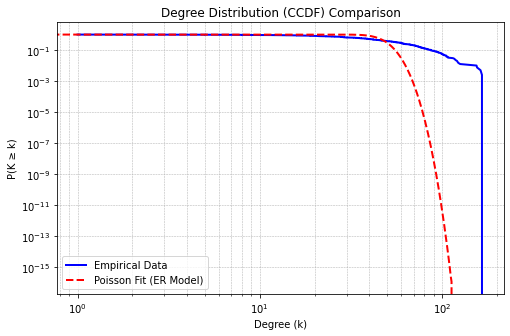

In [10]:
# Compute CCDF for real data
sorted_degrees = np.sort(degrees)
ccdf_real = 1 - np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)

# Generate Poisson CCDF
x_vals = np.arange(0, max(degrees) + 1)
poisson_cdf = poisson.cdf(x_vals, lambda_er)
poisson_ccdf = 1 - poisson_cdf  # Complementary CDF

# Plot CCDF
plt.figure(figsize=(8, 5))

# Plot CCDF of real data
plt.plot(sorted_degrees, ccdf_real, 'b-', linewidth=2, label="Empirical Data")

# Plot Poisson fit (ER Model)
plt.plot(x_vals, poisson_ccdf, 'r--', linewidth=2, label="Poisson Fit (ER Model)")

# Log-log scale for better visibility
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("P(K ≥ k)")
plt.title("Degree Distribution (CCDF) Comparison")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Calculating best minimal value for power law fit


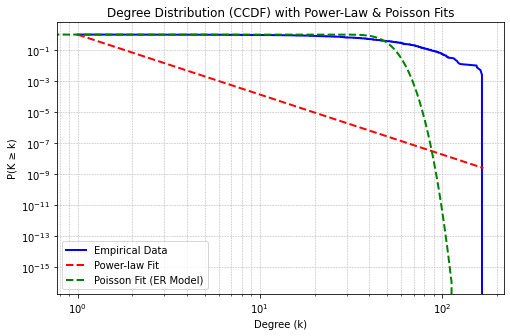

Power-law exponent (α): 4.8699
Kolmogorov-Smirnov (KS) Statistic for Power-law Fit: 0.0766
Poisson (ER) mean degree (λ): 46.9576


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from scipy.stats import poisson

# Step 1: Compute the empirical CCDF
sorted_degrees = np.sort(degrees)
ccdf_real = 1 - np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)

# Step 2: Fit a power-law distribution
fit = powerlaw.Fit(degrees)
alpha = fit.alpha
ks_powerlaw = fit.power_law.KS()

# Generate power-law CCDF
x_vals_powerlaw = np.linspace(min(degrees), max(degrees), 100)
powerlaw_ccdf = x_vals_powerlaw ** (-alpha + 1)  # CCDF for power-law

# Step 3: Fit an ER (Poisson) distribution
lambda_er = np.mean(degrees)  # Mean degree (ER model)
x_vals_er = np.arange(0, max(degrees) + 1)
poisson_cdf = poisson.cdf(x_vals_er, lambda_er)
poisson_ccdf = 1 - poisson_cdf  # Complementary CDF

# Step 4: Plot both fits with empirical data
plt.figure(figsize=(8, 5))

# Plot CCDF of real data
plt.plot(sorted_degrees, ccdf_real, 'b-', linewidth=2, label="Empirical Data")

# Plot power-law fit
plt.plot(x_vals_powerlaw, powerlaw_ccdf / max(powerlaw_ccdf), 'r--', linewidth=2, label="Power-law Fit")

# Plot Poisson fit (ER Model)
plt.plot(x_vals_er, poisson_ccdf, 'g--', linewidth=2, label="Poisson Fit (ER Model)")

# Log-log scale for better visibility
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("P(K ≥ k)")
plt.title("Degree Distribution (CCDF) with Power-Law & Poisson Fits")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Print results
print(f"Power-law exponent (α): {alpha:.4f}")
print(f"Kolmogorov-Smirnov (KS) Statistic for Power-law Fit: {ks_powerlaw:.4f}")
print(f"Poisson (ER) mean degree (λ): {lambda_er:.4f}")
